In [1]:
import zipfile
import os

# Ruta del archivo ZIP
zip_file = r'C:\Users\MAYRA ROCIO\Downloads\Toyota Motors Stock Data (1980-2024).zip'
extract_path = r'C:\Users\MAYRA ROCIO\Downloads\Toyota_Stock_Data'

# Descomprimir el archivo
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verificar los archivos extraídos
extracted_files = os.listdir(extract_path)
print("Archivos extraídos:", extracted_files)


Archivos extraídos: ['Toyota_Data.csv']


In [3]:
import pandas as pd
import os
import zipfile

# Ruta del archivo ZIP
zip_path = r'C:\Users\MAYRA ROCIO\Downloads\Toyota Motors Stock Data (1980-2024).zip'

# Directorio donde extraer los archivos
extract_path = r'C:\Users\MAYRA ROCIO\Downloads\Toyota_Stock_Extracted'

# Extraer el archivo ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verificar los archivos extraídos
extracted_files = os.listdir(extract_path)
print("Archivos extraídos:", extracted_files)

# Ahora cargar el archivo CSV correcto
csv_file = os.path.join(extract_path, 'Toyota_Data.csv')  # Ajustamos el nombre aquí

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(csv_file)

# Mostrar las primeras filas del DataFrame
print(df.head())



Archivos extraídos: ['Toyota_Data.csv']
         Date  Adj Close     Close      High       Low      Open  Volume
0  1980-03-17   2.296798  3.291227  3.344743  3.291227  0.000000   41109
1  1980-03-18   2.306134  3.304606  3.358122  3.304606  0.000000    9343
2  1980-03-19   2.306134  3.304606  3.304606  3.304606  3.304606       0
3  1980-03-20   2.306134  3.304606  3.358122  3.304606  0.000000   10277
4  1980-03-21   2.362154  3.384880  3.438396  3.384880  0.000000    8409


In [4]:
# Verificar las primeras filas del DataFrame
print(df.head())

# Verificar el tipo de datos y valores nulos
print(df.info())

# Estadísticas descriptivas
print(df.describe())


         Date  Adj Close     Close      High       Low      Open  Volume
0  1980-03-17   2.296798  3.291227  3.344743  3.291227  0.000000   41109
1  1980-03-18   2.306134  3.304606  3.358122  3.304606  0.000000    9343
2  1980-03-19   2.306134  3.304606  3.304606  3.304606  3.304606       0
3  1980-03-20   2.306134  3.304606  3.358122  3.304606  0.000000   10277
4  1980-03-21   2.362154  3.384880  3.438396  3.384880  0.000000    8409
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11291 non-null  object 
 1   Adj Close  11291 non-null  float64
 2   Close      11291 non-null  float64
 3   High       11291 non-null  float64
 4   Low        11291 non-null  float64
 5   Open       11291 non-null  float64
 6   Volume     11291 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 617.6+ KB
None
          Adj Close      

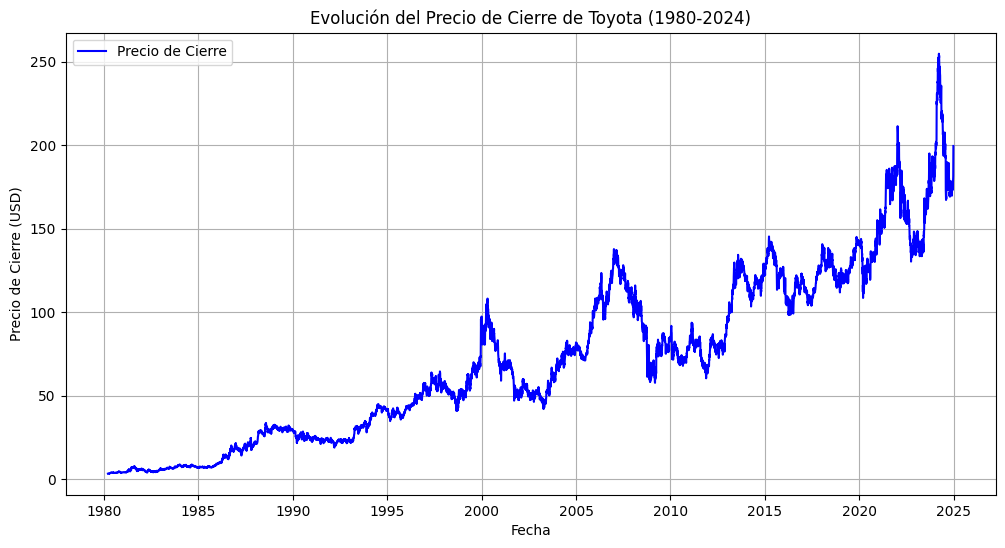

In [5]:
import matplotlib.pyplot as plt

# Aseguramos que la columna de fecha esté en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Graficamos la evolución del precio de cierre
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Precio de Cierre', color='blue')
plt.title('Evolución del Precio de Cierre de Toyota (1980-2024)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.grid(True)
plt.legend()
plt.show()


In [6]:
# Comprobar valores nulos
print(df.isnull().sum())

# Eliminar filas con valores nulos (si es necesario)
df = df.dropna()

# Verificar si hay valores nulos
print(df.isnull().sum())


Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [7]:
# Convertir la fecha a valores numéricos
df['Date_ordinal'] = df['Date'].apply(lambda x: x.toordinal())

# Seleccionar las características (features) y la variable objetivo (target)
X = df[['Date_ordinal', 'Open', 'High', 'Low', 'Volume']]  # Características
y = df['Close']  # Variable objetivo: Precio de Cierre

# Verificar las primeras filas de los datos procesados
print(X.head())
print(y.head())


   Date_ordinal      Open      High       Low  Volume
0        722891  0.000000  3.344743  3.291227   41109
1        722892  0.000000  3.358122  3.304606    9343
2        722893  3.304606  3.304606  3.304606       0
3        722894  0.000000  3.358122  3.304606   10277
4        722895  0.000000  3.438396  3.384880    8409
0    3.291227
1    3.304606
2    3.304606
3    3.304606
4    3.384880
Name: Close, dtype: float64


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Resultados de la evaluación
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 0.23229114744842233
Mean Squared Error (MSE): 0.17055166821441664
Root Mean Squared Error (RMSE): 0.41297901667568615


In [9]:
# Predicción para fechas futuras
future_dates = pd.date_range(start='2024-12-01', end='2024-12-10', freq='B')  # Fechas futuras
future_dates_ordinal = future_dates.to_series().apply(lambda x: x.toordinal())
future_X = np.column_stack((future_dates_ordinal, np.zeros(len(future_dates_ordinal)), np.zeros(len(future_dates_ordinal)), np.zeros(len(future_dates_ordinal)), np.zeros(len(future_dates_ordinal))))

# Realizar predicciones
future_predictions = rf.predict(future_X)

# Mostrar las predicciones
predictions_df = pd.DataFrame({
    'Fecha': future_dates,
    'Predicción de Precio de Cierre': future_predictions
})

print(predictions_df)


       Fecha  Predicción de Precio de Cierre
0 2024-12-02                        3.509658
1 2024-12-03                        3.509658
2 2024-12-04                        3.509658
3 2024-12-05                        3.509658
4 2024-12-06                        3.509658
5 2024-12-09                        3.509658
6 2024-12-10                        3.509658


C:\Users\MAYRA ROCIO\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


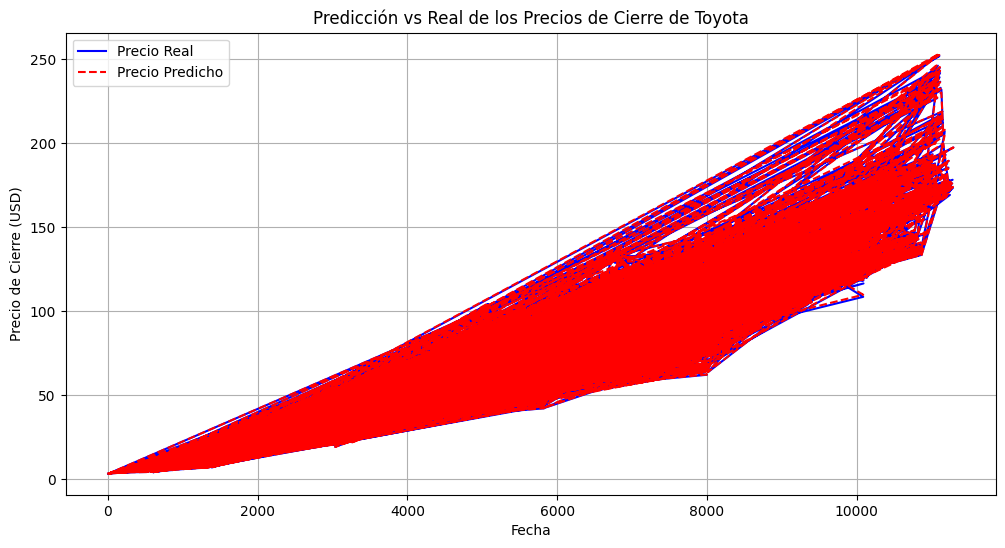

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Precio Real', color='blue')
plt.plot(y_test.index, y_pred, label='Precio Predicho', color='red', linestyle='--')
plt.title('Predicción vs Real de los Precios de Cierre de Toyota')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()
